In [ ]:
from google.colab import drive
drive.mount('/content/drive')

# Import the necessary packages
import numpy as np
import pandas as pd

# Data visualization
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

# Algorithms
from sklearn.model_selection import cross_val_score
from sklearn import preprocessing
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import mean_squared_error
from sklearn import metrics
from sklearn.model_selection import learning_curve

Mounted at /content/drive


In [ ]:
data = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/DATN/Benh-than_revised_data2.csv", index_col = None)
data.loc[data["ICD Code"] == 3, "ICD Code"] = 2
print(f"The dataset size: {data.shape}")

The dataset size: (3638, 16)


In [ ]:
data.head()

,Age,Gender,WBC +,LY% --,NE% +,RBC,HGB,HCT -,PLT,Na +,K+,total protein,Albumin,Ure,Creatinin,ICD Code
0,78,1,6.13,14.4,77.7,2.98,88.0,25.5,98.0,139.80,3.70,71.28,36.3,2.988,55.43,2
1,16,0,7.69,13.6,73.5,3.64,81.0,25.5,249.0,141.90,3.70,60.77,28.2,18.003,566.34,2
2,51,0,10.13,14.8,82.2,3.74,127.0,35.6,179.0,138.95,3.42,74.10,38.9,4.200,94.00,2
3,79,0,4.33,25.5,62.6,3.34,101.0,30.8,260.0,134.35,3.06,73.90,33.7,6.400,476.00,2
4,42,1,3.53,13.0,75.0,1.58,47.0,13.0,52.0,125.50,6.82,66.50,32.6,50.400,2246.00,2


In [ ]:
data.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3638 entries, 0 to 3637
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Age            3638 non-null   int64  
 1   Gender         3638 non-null   int64  
 2   WBC +          3638 non-null   float64
 3   LY% --         3638 non-null   float64
 4   NE% +          3638 non-null   float64
 5   RBC            3638 non-null   float64
 6   HGB            3638 non-null   float64
 7   HCT -          3638 non-null   float64
 8   PLT            3638 non-null   float64
 9   Na +           3638 non-null   float64
 10  K+             3638 non-null   float64
 11  total protein  3638 non-null   float64
 12  Albumin        3638 non-null   float64
 13  Ure            3638 non-null   float64
 14  Creatinin      3638 non-null   float64
 15  ICD Code       3638 non-null   int64  
dtypes: float64(13), int64(3)
memory usage: 454.9 KB


In [ ]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,3638.0,44.595657,18.600308,0.00,31.0000,44.0000,58.0000,95.000
Gender,3638.0,0.555525,0.496976,0.00,0.0000,1.0000,1.0000,1.000
WBC +,3638.0,8.111410,4.198566,1.11,5.6100,7.1700,9.4975,71.480
LY% --,3638.0,23.083656,10.901245,0.50,15.9000,22.2000,29.2000,98.100
NE% +,3638.0,67.073406,12.898885,0.01,59.2000,67.5000,75.7000,98.000
RBC,3638.0,4.114920,1.100185,1.33,3.4400,4.1300,4.7300,42.000
HGB,3638.0,114.759365,23.006677,3.87,100.0000,117.0000,131.0000,186.000
HCT -,3638.0,34.466814,7.168436,11.30,29.7000,35.1000,39.4000,126.000
PLT,3638.0,256.266493,108.939691,13.00,191.0000,241.0000,301.0000,1546.000
Na +,3638.0,138.558205,4.275954,5.30,136.9000,138.8000,140.6375,172.100


In [ ]:
# Count the missing and null values for dataset
miss_values = data.columns[data.isnull().any()]
print(f"Missing values:\n{data[miss_values].isnull().sum()}")

null_values = data.columns[data.isna().any()]
print(f"Null values:\n{data[null_values].isna().sum()}")

Missing values:
Series([], dtype: float64)
Null values:
Series([], dtype: float64)


0    2055
2    1490
1      93
Name: ICD Code, dtype: int64


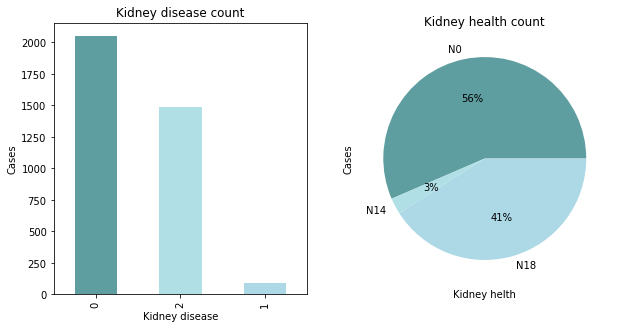

In [ ]:
total = data["ICD Code"].sum()

result_counts = data['ICD Code'].value_counts()
print(result_counts)
N0 = result_counts[0]
N14 = result_counts[1]
N18 = result_counts[2]


plt.figure(figsize = (10,5))
plt.subplot(121)
vis_fetal_health = data['ICD Code'].value_counts().plot(figsize=(10, 5), kind="bar", color = ["#5F9EA0", "#B0E0E6", "#ADD8E6"])
plt.title("Kidney disease count")
plt.xlabel("Kidney disease")
plt.ylabel("Cases")


plt.subplot(122)
plt.title("Kidney state") 

vis_pie_fetal_health = plt.pie([N0, N14, N18], labels=["N0", "N14", "N18"], colors = ["#5F9EA0", "#B0E0E6", "#ADD8E6"], autopct="%1.0f%%")
plt.title("Kidney health count")
plt.xlabel("Kidney helth")
plt.ylabel("Cases")


plt.show()

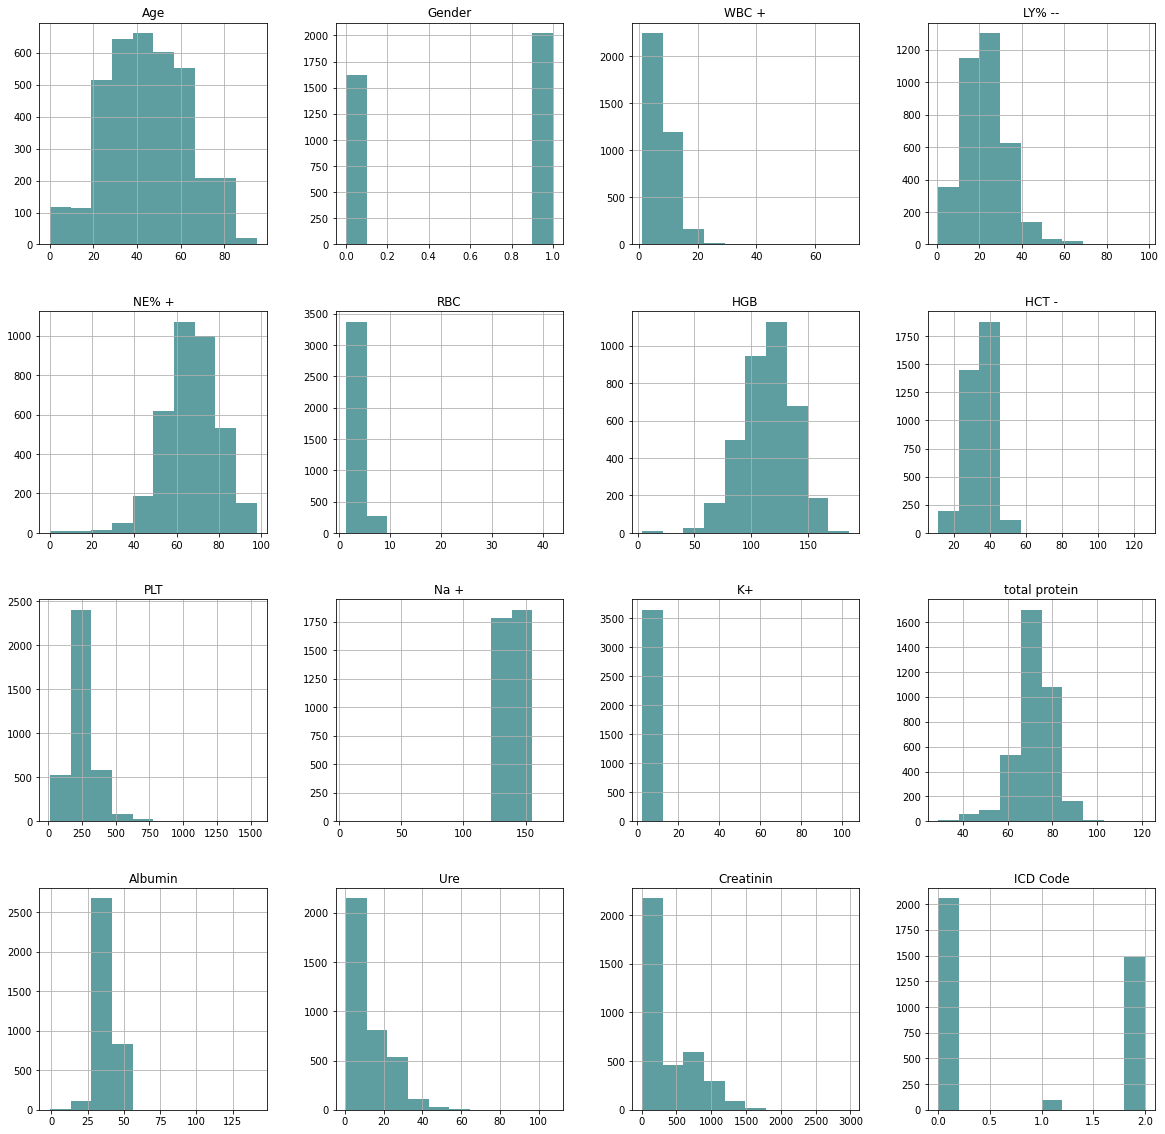

In [ ]:
data_hist_plot = data.hist(figsize = (20,20), color = "#5F9EA0")

In [ ]:
numeric_data = data.select_dtypes(exclude="object")
numeric_corr = numeric_data.corr()
num_feature = numeric_corr["ICD Code"].sort_values(ascending=False).head(20).to_frame()

cm = sns.light_palette("#5F9EA0", as_cmap=True)

style = num_feature.style.background_gradient(cmap=cm)
style

,ICD Code
ICD Code,1.000000
Creatinin,0.814367
Ure,0.744198
Age,0.240622
NE% +,0.097593
K+,0.095139
Na +,-0.085587
total protein,-0.086617
LY% --,-0.129098
Albumin,-0.129162


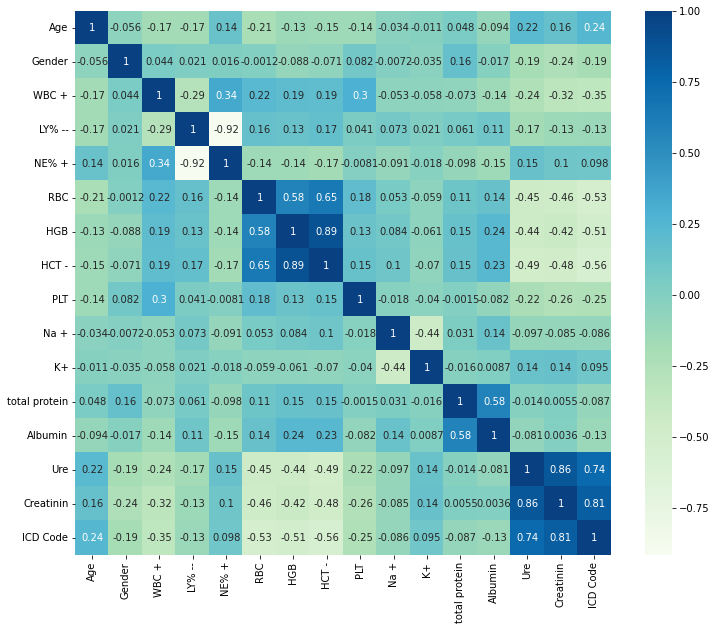

In [ ]:
plt.figure(figsize=(12,10))  

# Seaborn has very simple solution for heatmap
p=sns.heatmap(numeric_data.corr(), annot=True, cmap = "GnBu")  

In [ ]:
y = data['ICD Code']
x = data.drop(["ICD Code"],axis = 1)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, stratify=y)

# y_train = y_train.replace(to_replace=[2,3],value=1)
# y_test = y_test.replace(to_replace=[2,3],value=1)
# y_test.agg([pd.Series.value_counts, lambda x: x.value_counts(normalize=True)])

In [ ]:
param_grid = { 
    'n_estimators': [100, 200],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [4,6,8,10],
    'min_samples_split': [2, 4, 6]
}

In [ ]:
rfc=RandomForestClassifier(random_state=42)
CV_rfc = GridSearchCV(estimator=rfc, param_grid=param_grid, cv= 5)
# CV_rfc.fit(x_train, y_train)

In [ ]:
# CV_rfc.best_params_

best_param = {'max_depth': 8,
 'max_features': 'auto',
 'min_samples_split': 6,
 'n_estimators': 100}

In [ ]:
clf = RandomForestClassifier(criterion="gini", max_features='auto', max_depth=8, min_samples_split=4, n_estimators=100)
clf.fit(x_train, y_train)
y_pred = clf.predict(x_test)

# Report
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))
target_names = ['N0', 'N14-1', 'N18-2']
print(classification_report(y_test, y_pred, target_names=target_names))

Accuracy: 0.9608659450457951
              precision    recall  f1-score   support

          N0       0.97      0.97      0.97       678
       N14-1       0.90      0.61      0.73        31
       N18-2       0.95      0.97      0.96       492

    accuracy                           0.96      1201
   macro avg       0.94      0.85      0.89      1201
weighted avg       0.96      0.96      0.96      1201



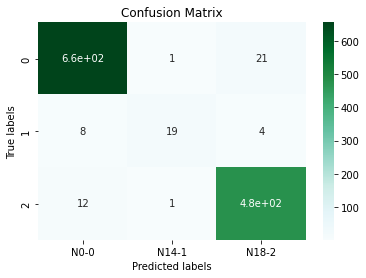

In [ ]:
# plot confusion matrix
ax = plt.subplot()
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, ax=ax, cmap="BuGn");
ax.set_xlabel("Predicted labels");
ax.set_ylabel("True labels");
ax.set_title("Confusion Matrix");
ax.xaxis.set_ticklabels(['N0-0', 'N14-1', 'N18-2']);

In [ ]:
param_grid = { 
    'n_neighbors': [3, 6, 9, 12, 15]
}
rfc=KNeighborsClassifier()
CV_rfc = GridSearchCV(estimator=rfc, param_grid=param_grid)
CV_rfc.fit(x_train, y_train)
CV_rfc.best_params_

{'n_neighbors': 6}

In [ ]:
clf = KNeighborsClassifier(n_neighbors=3)
clf.fit(x_train, y_train)
y_pred = clf.predict(x_test)

# Report
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))
target_names = ['N0', 'N14-1', 'N18-2']
print(classification_report(y_test, y_pred, target_names=target_names))

Accuracy: 0.9508742714404663
              precision    recall  f1-score   support

          N0       0.95      0.96      0.96       678
       N14-1       0.81      0.42      0.55        31
       N18-2       0.95      0.97      0.96       492

    accuracy                           0.95      1201
   macro avg       0.91      0.78      0.82      1201
weighted avg       0.95      0.95      0.95      1201



In [ ]:
from sklearn.svm import SVC

param_grid = { 
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
    'gamma' : ['scale', 'auto']
}
rfc=SVC()
CV_rfc = GridSearchCV(estimator=rfc, param_grid=param_grid)
# CV_rfc.fit(x_train, y_train)
# CV_rfc.best_params_

In [ ]:
clf = SVC(kernel='poly', gamma='auto')
clf.fit(x_train, y_train)
y_pred = clf.predict(x_test)

# Report
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))
target_names = ['N0', 'N14-1', 'N18-2']
print(classification_report(y_test, y_pred, target_names=target_names))

In [ ]:
import pickle

# save
# with open('model.pkl','wb') as f:
    # pickle.dump(clf, f)